In [9]:
!pip install Sastrawi
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.2 MB/s eta 0:00:00


In [17]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as stopwords_scratch
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import emoji
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
feature_bow = pickle.load(open("./model/feature-bow.p",'rb'))
model_nb = pickle.load(open('./model/model-nb.p', 'rb'))
model_nn = pickle.load(open('./model/model-nn.p', 'rb'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 0.22.2.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 0.22.2.post1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.2.post1 when using version 1.5.2. This might lead

In [19]:
# Panggil stopword ID
list_stopwords = stopwords_scratch.words('indonesian')
# Panggil stopword EN
list_stopwords_en = stopwords_scratch.words('english')
# Gabungkan ID & EN
list_stopwords.extend(list_stopwords_en)
# Tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy', 'gak', 'nya'])

In [21]:
# Buat DataFrame dari list stopwords
stopwords_df = pd.DataFrame(list_stopwords, columns=['stopword'])

# Simpan DataFrame sebagai CSV
stopwords_df.to_csv('./dataset/stopwords.csv', index=False, header=False)

In [22]:
df = pd.read_csv('./dataset/data_clean.csv')
stopword = pd.read_csv('./dataset/stopwords.csv', header=None)

In [23]:
import pandas as pd

# Baca dataset asli
dataset = pd.read_csv('./dataset/hasil_processing.csv')

# Pilih hanya satu kolom yang diinginkan
kolom_terpilih = dataset[['cleaning']]

# Simpan ke file dataset baru
kolom_terpilih.to_csv('./dataset/data_clean.csv', index=False)

print("Dataset baru berhasil dibuat!")


Dataset baru berhasil dibuat!


In [24]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [34]:
def preprocess_text(text):
    # Hapus emoji
    text = emoji.replace_emoji(text, replace="")
    # Hapus nama orang (jika ada pola umum, misalnya kapitalisasi atau nama-nama tertentu)
    text = re.sub(r'\b[A-Z][a-z]*\b', '', text)
    # Hapus karakter khusus, angka, dan URL
    text = re.sub(r'http\S+|www\S+|https\S+|[^a-zA-Z\s]', '', text)
    # Konversi ke lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopword]
    # Remove very short words (less than 2 characters)
    tokens = [word for word in tokens if len(word) > 2]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back to a single string
    return ' '.join(tokens)

In [27]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
df.isna().sum()

df = df.dropna(subset=["cleaning"])
df.isna().sum()

,0
cleaning,0
cleaned_x,0


In [36]:
df['cleaned_x'] = df['cleaning'].apply(preprocess_text)

# Tampilkan hasil pre-processing pada beberapa baris pertama
print(df[['cleaning', 'cleaned_x']].head())

                                            cleaning  \
0  queen bee syndrome iriana sebab runtuh raja jo...   
1  gibran pulang solo jumat siang jokowi malam mi...   
2  lengser jokowi resmi istana ikn gibran  tempat...   
3  momen debar jelang pensiun jokowi acara usaha ...   
4  mahasiswa jaket kuning kepung dpr tolak gibran...   

                                           cleaned_x  
0  queen bee syndrome iriana sebab runtuh raja jo...  
1  gibran pulang solo jumat siang jokowi malam mi...  
2  lengser jokowi resmi istana ikn gibran tempat ...  
3  momen debar jelang pensiun jokowi acara usaha ...  
4  mahasiswa jaket kuning kepung dpr tolak gibran...  


In [37]:
df = df[df['cleaned_x'].str.strip() != '']

In [38]:
df.to_csv('./dataset/cleaned_x.csv', index=False)

In [40]:
data_cleaned = pd.read_csv('./dataset/cleaned_x.csv')
data_cleaned.head()

,cleaning,cleaned_x
0,queen bee syndrome iriana sebab runtuh raja jo...,queen bee syndrome iriana sebab runtuh raja jo...
1,gibran pulang solo jumat siang jokowi malam mi...,gibran pulang solo jumat siang jokowi malam mi...
2,lengser jokowi resmi istana ikn gibran tempat...,lengser jokowi resmi istana ikn gibran tempat ...
3,momen debar jelang pensiun jokowi acara usaha ...,momen debar jelang pensiun jokowi acara usaha ...
4,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...


In [41]:
def predict_sentiment(sent):
    text=str(sent)
    # feature extraction
    text_feature = feature_bow.transform([text])
    # predict
    return model_nb.predict(text_feature)[0]

In [43]:
data_cleaned['predicted_sentiment'] = data_cleaned.cleaned_x.apply(predict_sentiment)

data_cleaned.head()

,cleaning,cleaned_x,predicted_sentiment
0,queen bee syndrome iriana sebab runtuh raja jo...,queen bee syndrome iriana sebab runtuh raja jo...,negative
1,gibran pulang solo jumat siang jokowi malam mi...,gibran pulang solo jumat siang jokowi malam mi...,neutral
2,lengser jokowi resmi istana ikn gibran tempat...,lengser jokowi resmi istana ikn gibran tempat ...,negative
3,momen debar jelang pensiun jokowi acara usaha ...,momen debar jelang pensiun jokowi acara usaha ...,neutral
4,mahasiswa jaket kuning kepung dpr tolak gibran...,mahasiswa jaket kuning kepung dpr tolak gibran...,negative


In [44]:
data_cleaned.to_csv('./dataset/predicted_sentiment.csv', index=False)

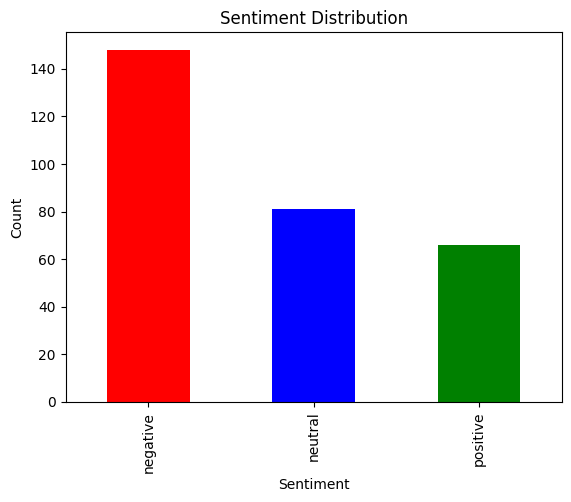

In [45]:
df = pd.read_csv('./dataset/predicted_sentiment.csv')

sentiment_counts = df['predicted_sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [46]:
min_count = sentiment_counts.min()

# Sample the minimum count of each sentiment
df_balanced = df.groupby('predicted_sentiment').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

print(df_balanced['predicted_sentiment'].value_counts())

predicted_sentiment
negative    66
neutral     66
positive    66
Name: count, dtype: int64


<ipython-input-46-3ce8f19c5ede>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('predicted_sentiment').apply(lambda x: x.sample(min_count)).reset_index(drop=True)


In [47]:
df_balanced.to_csv('./dataset/predicted_sentiment_balanced.csv', index=False)